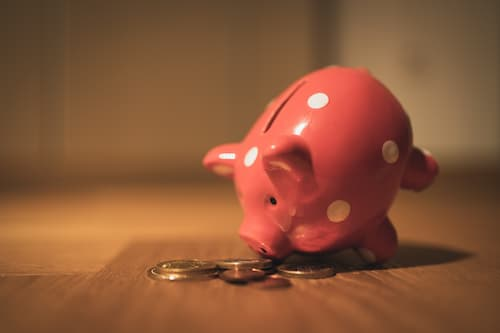

Personal loans are a lucrative revenue stream for banks. The typical interest rate of a two-year loan in the United Kingdom is around 10%. This might not sound like a lot, but in September 2022 alone UK consumers borrowed around £1.5 billion, which would mean approximately £300 million in interest generated by banks over two years!

You have been asked to work with a bank to clean the data they collected as part of a recent marketing campaign, which aimed to get customers to take out a personal loan. They plan to conduct more marketing campaigns going forward so would like you to ensure it conforms to the specific structure and data types that they specify so that they can then use the cleaned data you provide to set up a PostgreSQL database, which will store this campaign's data and allow data from future campaigns to be easily imported.

They have supplied you with a csv file called "bank_marketing.csv", which you will need to clean, reformat, and split the data, saving three final csv files. Specifically, the three files should have the names and contents as outlined below:


### client.csv

| column          | data type | description                     | cleaning requirements                                                                                   |
|-----------------|-----------|---------------------------------|----------------------------------------------------------------------------------------------------------|
| client_id       | integer   | Client ID                       | N/A                                                                                                      |
| age             | integer   | Client's age in years           | N/A                                                                                                      |
| job             | object    | Client's type of job            | Change "-" to "_"                                                                                        |
| marital         | object    | Client's marital status         | N/A                                                                                                      |
| education       | object    | Client's level of education     | Change "-" to "_" and "unknown" to `np.NaN`                                                              |
| credit_default  | bool      | Whether the client's credit is in default | Convert to boolean data type: 1 if "yes", otherwise 0                                          |
| mortgage        | bool      | Whether the client has an existing mortgage (housing loan) | Convert to boolean data type: 1 if "yes", otherwise 0                                        |

---

### campaign.csv

| column                   | data type | description                                                       | cleaning requirements                                                                                       |
|--------------------------|-----------|-------------------------------------------------------------------|------------------------------------------------------------------------------------------------------------|
| client_id                | integer   | Client ID                                                        | N/A                                                                                                        |
| number_contacts          | integer   | Number of contact attempts to the client in the current campaign  | N/A                                                                                                        |
| contact_duration         | integer   | Last contact duration in seconds                                  | N/A                                                                                                        |
| previous_campaign_contacts| integer   | Number of contact attempts to the client in the previous campaign | N/A                                                                                                        |
| previous_outcome         | bool      | Outcome of the previous campaign                                  | Convert to boolean data type: 1 if "success", otherwise 0                                                   |
| campaign_outcome         | bool      | Outcome of the current campaign                                   | Convert to boolean data type: 1 if "yes", otherwise 0                                                       |
| last_contact_date        | datetime  | Last date the client was contacted                                | Create from a combination of `day`, `month`, and a newly created `year` column (which should have a value of 2022); Format = "YYYY-MM-DD" |

---

### economics.csv

| column             | data type | description                         | cleaning requirements |
|--------------------|-----------|-------------------------------------|-----------------------|
| client_id          | integer   | Client ID                           | N/A                   |
| cons_price_idx     | float     | Consumer price index (monthly indicator) | N/A               |
| euribor_three_months| float     | Euro Interbank Offered Rate (euribor) three-month rate (daily indicator) | N/A   |



In [ ]:
import pandas as pd 
import numpy as np

In [ ]:
df = pd.read_csv("bank_marketing.csv")

df.head()

# Clients

| column          | data type | description                     | cleaning requirements                                                                                   |
|-----------------|-----------|---------------------------------|----------------------------------------------------------------------------------------------------------|
| client_id       | integer   | Client ID                       | N/A                                                                                                      |
| age             | integer   | Client's age in years           | N/A                                                                                                      |
| job             | object    | Client's type of job            | Change "-" to "_"                                                                                        |
| marital         | object    | Client's marital status         | N/A                                                                                                      |
| education       | object    | Client's level of education     | Change "-" to "_" and "unknown" to `np.NaN`                                                              |
| credit_default  | bool      | Whether the client's credit is in default | Convert to boolean data type: 1 if "yes", otherwise 0                                          |
| mortgage        | bool      | Whether the client has an existing mortgage (housing loan) | Convert to boolean data type: 1 if "yes", otherwise 0                                        |


In [ ]:
client_columns = ['client_id', 'age', 'job', 'marital', 'education', 'credit_default', 'mortgage']
clients = df[client_columns]
clients

In [ ]:
clients.loc[:,'job'] = clients['job'].str.replace('-', '_')
clients.loc[:,'education'] = clients['education'].str.replace('.', '_')
clients.loc[:,'education'] = np.where(clients['education']=='unknown', np.nan, clients['education'])
clients.loc[:,'credit_default'] = np.where(clients['credit_default']=='yes', 1, 0)
clients.loc[:,'mortgage'] = np.where(clients['mortgage']=='yes', 1, 0)

clients.head(20)

In [ ]:
clients.loc[:,'mortgage'] = clients['mortgage'].astype(bool)
clients.loc[:,'credit_default'] = clients['credit_default'].astype(bool)

clients.head(20)

In [ ]:
clients.to_csv('clients.csv', index=False)

# Campaigns

| column                   | data type | description                                                       | cleaning requirements                                                                                       |
|--------------------------|-----------|-------------------------------------------------------------------|------------------------------------------------------------------------------------------------------------|
| client_id                | integer   | Client ID                                                        | N/A                                                                                                        |
| number_contacts          | integer   | Number of contact attempts to the client in the current campaign  | N/A                                                                                                        |
| contact_duration         | integer   | Last contact duration in seconds                                  | N/A                                                                                                        |
| previous_campaign_contacts| integer   | Number of contact attempts to the client in the previous campaign | N/A                                                                                                        |
| previous_outcome         | bool      | Outcome of the previous campaign                                  | Convert to boolean data type: 1 if "success", otherwise 0                                                   |
| campaign_outcome         | bool      | Outcome of the current campaign                                   | Convert to boolean data type: 1 if "yes", otherwise 0                                                       |
| last_contact_date        | datetime  | Last date the client was contacted                                | Create from a combination of `day`, `month`, and a newly created `year` column (which should have a value of 2022); Format = "YYYY-MM-DD" |

In [ ]:
df.columns

In [ ]:
campaign_columns = ['client_id', 'number_contacts', 'contact_duration', 'previous_campaign_contacts', 'previous_outcome', 'campaign_outcome', 'month', 'day']
campaign = df[campaign_columns]
campaign

In [ ]:
campaign.loc[:,'previous_outcome'] = np.where(campaign['previous_outcome']=='success', 1, 0)
campaign.loc[:,'campaign_outcome'] = np.where(campaign['campaign_outcome']=='yes', 1, 0)

campaign.loc[:,'previous_outcome'] = campaign['previous_outcome'].astype(bool)
campaign.loc[:,'campaign_outcome'] = campaign['campaign_outcome'].astype(bool)

campaign.loc[:,'year'] = 2022

campaign.loc[:, 'last_contact_date'] = pd.to_datetime(campaign['year'].astype(str) + "-" + campaign['month'] + "-" + campaign['day'].astype(str), format="%Y-%b-%d")

campaign.head(20)

In [ ]:
campaign.drop(['day', 'month', 'year'], axis=1, inplace=True)

campaign.to_csv('campaign.csv', index=False)

# Economics

| column             | data type | description                         | cleaning requirements |
|--------------------|-----------|-------------------------------------|-----------------------|
| client_id          | integer   | Client ID                           | N/A                   |
| cons_price_idx     | float     | Consumer price index (monthly indicator) | N/A               |
| euribor_three_months| float     | Euro Interbank Offered Rate (euribor) three-month rate (daily indicator) | N/A   |


In [ ]:
economics_columns = ['client_id','cons_price_idx','euribor_three_months']

economics = df[economics_columns]
economics.head()

In [ ]:
economics.to_csv('economics.csv', index=False)